In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
df = pd.read_csv("./data/patients.csv")
size = len(df)
df.head(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Manage Null values

In [4]:
df.isna().sum()/size*100

ID                0.000000
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

In [5]:
df.drop(df[df['Stage'].isna()].index, inplace=True)

Droped all rows without stage, definietly useless data

Text(0, 0.5, 'Number of Rows')

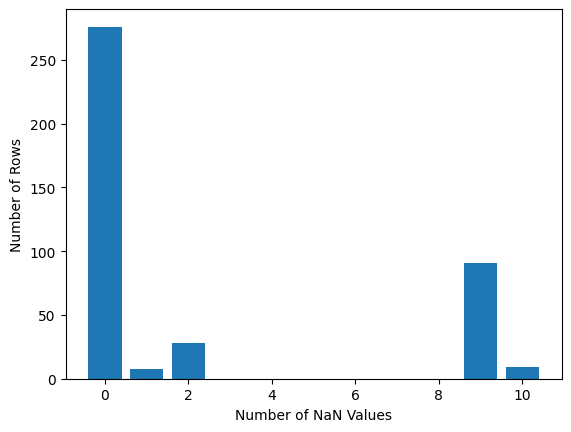

In [6]:
df['nan_count'] = df.isna().sum(axis=1)
grouped = df.groupby(['nan_count']).count()
plt.bar(grouped.index, grouped['ID'])
plt.xlabel('Number of NaN Values')
plt.xticks()
plt.ylabel('Number of Rows')

### Check rows with certain amount of nan

In [7]:
df[df['nan_count'] == 9]

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,nan_count
313,314,3561,D,NaN,23741,F,NaN,NaN,NaN,S,...,NaN,3.04,NaN,NaN,NaN,NaN,331.0,12.1,4.0,9
314,315,2844,C,NaN,19724,F,NaN,NaN,NaN,N,...,NaN,4.03,NaN,NaN,NaN,NaN,226.0,9.8,4.0,9
317,318,1680,C,NaN,15706,F,NaN,NaN,NaN,N,...,NaN,3.68,NaN,NaN,NaN,NaN,306.0,9.5,2.0,9
319,320,2403,C,NaN,16071,F,NaN,NaN,NaN,S,...,NaN,3.81,NaN,NaN,NaN,NaN,226.0,10.5,3.0,9
320,321,1170,C,NaN,22280,M,NaN,NaN,NaN,S,...,NaN,3.41,NaN,NaN,NaN,NaN,259.0,10.9,4.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,...,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,9
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,...,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,9
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,...,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,9
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,...,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,9


In [8]:
df.drop(df[df['Prothrombin'].isna()].index, inplace=True)
df.drop(df[df['Platelets'].isna()].index, inplace=True)